### Analysis of Epinions Data

We are provided with the Epinions data collected through a general consumer review web site Epinions.com. Each user on the site can rate and post a review for products (items) and other users would rate the review to show the helpfulness of the review.
In this data, for each user, we have user ID, gender, ratings (1-5) and reviews towards the products they bought. For each rating, we have the product name and its category, the rating score, the time point when the rating is created, and the helpfulness (1-6) of this rating.

Originally, there are several separate files to record the user-item rating info, user demographic info and item descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'Epinions_test_data.csv'. The header of the csv file is shown below. 


| userId | gender | rating | review| item | category | helpfulness | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __item__ - the product's name
* __category__ - the category of the item
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __helpfulness__ - the helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created

Note that, a same user (i.e., a same userId) corresponds to a same gender; a same item corresponds to a same category; a same user (i.e., a same userId) may rate multiple items; a same item may receive ratings and reviews from multiple users and each review is associted with a single helpfulness value calculated based on the feedbacks from other users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
opinion = pd.read_csv('Epinions_test_data.csv')
opinion.head()

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance


In [4]:
#Length of the data (before dropping Null values)
opinion.shape[0]

2899

In [5]:
#Number of Null values in each column
opinion.isna().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
dtype: int64

In [4]:
#Drop Null values in columns gender, helpfulness and rating
opinion = opinion.dropna(subset=['gender', 'helpfulness', 'rating'])

#Drop reviews that are 'none'
opinion = opinion.drop(opinion.index[opinion.review == 'none'])

In [4]:
#Length of the data (after dropping Null values)
opinion.shape[0]

9890

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [35]:
#Q1

print('Number of unique users:', opinion['userId'].nunique())
print('Number of unique reviews:', opinion['review'].nunique())
print('Number of unique items:', opinion['item'].nunique())
print('Number of unique categories:', opinion['category'].nunique())
print('Number of unique genders:', opinion['gender'].nunique())

Number of unique users: 4326
Number of unique reviews: 9727
Number of unique items: 89
Number of unique categories: 9
Number of unique genders: 2


In [32]:
#Q2

#Mean, max min, std of rating values
opinion.rating.describe()

count    9890.000000
mean        3.701517
std         1.387026
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [8]:
#Q4

#Get unique values in item column and count the number of entries for each unique value

values, counts = np.unique(opinion.item, return_counts=True)

#Create dataframe for each item and the number of entries(ratings) for each item

item_rate = pd.DataFrame({'number_ratings' : counts},
              index = values
             )

item_rate

,number_ratings
AOL (America Online),446
All Advantage,306
Alta Vista (by 1stUp),84
Amazon.com,110
American Airlines,92
...,...
Wendy's,88
What Lies Beneath,85
X-Men,121
X.com,93


In [9]:
#Mean, max min, std of number of ratings for each item
item_rate.number_ratings.describe()

count     89.000000
mean     111.123596
std       55.955709
min       60.000000
25%       82.000000
50%       92.000000
75%      121.000000
max      446.000000
Name: number_ratings, dtype: float64

In [54]:
#Q3

#Filter table for rows with Gender value F (female)
#Get unique values in item column for this filtered table and count the number of entries for each unique value

valuesf, countsf = np.unique(opinion[opinion['gender'] == 'F'].item, return_counts=True)

#Create dataframe for each item and the number of entries(ratings) for each item
item_rate_f = pd.DataFrame({'number_ratings_f' : countsf},
              index = valuesf
             )

#Mean, max min, std of number of ratings for each item
item_rate_f.number_ratings_f.describe()

count     89.000000
mean      56.460674
std       27.777139
min       24.000000
25%       41.000000
50%       48.000000
75%       64.000000
max      212.000000
Name: number_ratings_f, dtype: float64

In [55]:
#Q3

#Filter table for rows with Gender value M (male)
#Get unique values in item column for this filtered table and count the number of entries for each unique value
valuesm, countsm = np.unique(opinion[opinion['gender'] == 'M'].item, return_counts=True)


#Create dataframe for each item and the number of entries(ratings) for each item
item_rate_m = pd.DataFrame({'number_ratings_m' : countsm},
              index = valuesm
             )

#Mean, max min, std of number of ratings for each item
item_rate_m.number_ratings_m.describe()

count     89.000000
mean      54.662921
std       29.272211
min       29.000000
25%       39.000000
50%       48.000000
75%       60.000000
max      234.000000
Name: number_ratings_m, dtype: float64

In [7]:
#Q3 Another interpretation

#Create dataframe of number of items rated by male and female

gender = pd.DataFrame({'count of items' : [opinion[opinion['gender'] == 'M'].item.count(), opinion[opinion['gender'] == 'F'].item.count()]},
              index = ['male', 'female']
             )

gender

,count of items
male,4865
female,5025


In [8]:
#Descriptive statistics of the two numbers

gender['count of items'].describe()

count       2.000000
mean     4945.000000
std       113.137085
min      4865.000000
25%      4905.000000
50%      4945.000000
75%      4985.000000
max      5025.000000
Name: count of items, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

# Gender and Rating values

- Mean of female rating values is 3.71 and male's is 3.69
- The min max, Q1-2-3 of male and female rating values are the same

--> This makes the two box plots look virtually the same

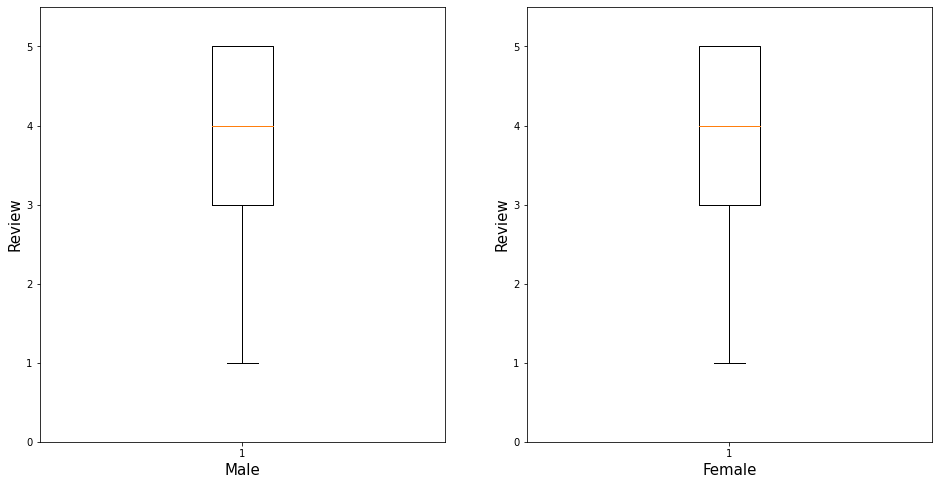

In [61]:
#Correlation between gender and their rating values

#Create figure
plt.figure(figsize = (16,8))

#Create sub-figure for Male, defining y-axis max to be 5.5 (because rating max is 5), x label and y label
plt.subplot(1,2,1)
plt.ylim(0,5.5)
plt.xlabel('Male', size = 15)
plt.ylabel('Review', size = 15)

#Create boxplot of rating values given by gender M(male) 
plt.boxplot(opinion[opinion['gender'] == 'M'].rating)

#Similarly for gender F(female)
plt.subplot(1,2,2)
plt.ylim(0,5.5)
plt.xlabel('Female', size = 15)
plt.ylabel('Review', size = 15)
plt.boxplot(opinion[opinion['gender'] == 'F'].rating)

plt.show()

Female and male seem to give similar rating levels

In [5]:
#Mean, Q1-2-3, max min of female review values

opinion[opinion['gender'] == 'F'].rating.describe()

count    5025.000000
mean        3.712040
std         1.387954
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [9]:
#Mean, Q1-2-3, max min of male review values

opinion[opinion['gender'] == 'M'].rating.describe()

count    4865.000000
mean        3.690647
std         1.386126
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

# Helpfulness and rating values

- Find out the number of entries for each helpfulness value for each rating value
- See the numbers in table form, that low ratings have low helpfulness values primarily as well, and vice versa
- See in boxplot form the helpfulness value of each rating value (observing mean, min max and Q1-2-3 of the helpfulness of each rating value)
- See a clear upward trend, with higher rating values the helpfulness also increases
- It is also good to note that there are more ratings for higher rating values

In [8]:
#Group the dataframe by columns rating and helpfulness

rating = opinion.groupby(['rating', 'helpfulness'])

#Count the number of entries for each helpfulness value for each rating value
rating.helpfulness.count()

rating  helpfulness
1.0     1.0             764
        2.0             386
2.0     1.0             372
        2.0             373
        3.0             371
3.0     2.0             443
        3.0             381
        4.0             406
4.0     3.0             816
        4.0             805
        5.0             875
5.0     4.0            1329
        5.0            1357
        6.0            1265
Name: helpfulness, dtype: int64

In [9]:
#Create dataframe for each rating value and the corresponding helpfulness values

helpfulness = pd.DataFrame({'Rating 1': opinion[opinion['rating'] == 1.0].helpfulness,
                           'Rating 2': opinion[opinion['rating'] == 2.0].helpfulness,
                          'Rating 3': opinion[opinion['rating'] == 3.0].helpfulness,
                          'Rating 4': opinion[opinion['rating'] == 4.0].helpfulness,
                          'Rating 5': opinion[opinion['rating'] == 5.0].helpfulness})

helpfulness

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
0,NaN,NaN,NaN,NaN,4.0
1,NaN,2.0,NaN,NaN,NaN
2,NaN,NaN,NaN,4.0,NaN
3,NaN,NaN,NaN,NaN,4.0
4,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...
9995,NaN,NaN,NaN,3.0,NaN
9996,NaN,1.0,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,4.0
9998,NaN,NaN,NaN,NaN,6.0


In [10]:
#See the descriptive statistics for each rating value

helpfulness.describe()

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
count,1150.000000,1116.000000,1230.000000,2496.000000,3951.000000
mean,1.335652,1.999104,2.969919,4.023638,4.983802
std,0.472423,0.816313,0.830602,0.822920,0.810214
min,1.000000,1.000000,2.000000,3.000000,4.000000
25%,1.000000,1.000000,2.000000,3.000000,4.000000
50%,1.000000,2.000000,3.000000,4.000000,5.000000
75%,2.000000,3.000000,4.000000,5.000000,6.000000
max,2.000000,3.000000,4.000000,5.000000,6.000000


<AxesSubplot:title={'center':'Helpfulness of Ratings 1-5'}, ylabel='Helpfulness'>

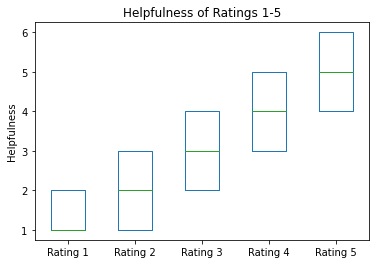

In [11]:
#Create box plots for each rating value

helpfulness[['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']].plot(kind='box', title='Helpfulness of Ratings 1-5',
                                                                              ylabel = 'Helpfulness')

In [12]:
opinion[['rating', 'helpfulness']]

,rating,helpfulness
0,5.0,4.0
1,2.0,2.0
2,4.0,4.0
3,5.0,4.0
4,5.0,5.0
...,...,...
9995,4.0,3.0
9996,2.0,1.0
9997,5.0,4.0
9998,5.0,6.0


<AxesSubplot:xlabel='rating', ylabel='helpfulness'>

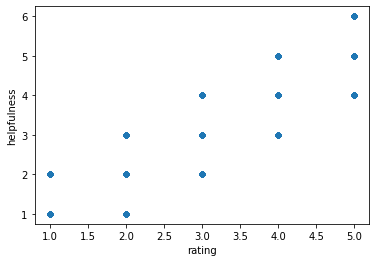

In [13]:
opinion[['rating', 'helpfulness']].plot.scatter(x='rating', y='helpfulness')

# Category and rating values

- Find out the number of entries for a rating value for each category, seeing roughly that some categories have higher rating values
- See categories under each rating value
- See boxplots of the rating values for each category

In [100]:
#Group the dataframe by category and rating values

category = opinion.groupby(['category', 'rating'])

#Count the number of entries for each rating value for each category
category.rating.count()

category                  rating
Books                     3.0          3
                          4.0         12
                          5.0         87
Games                     1.0         11
                          2.0         32
                          3.0         52
                          4.0        194
                          5.0        448
Hotels & Travel           1.0        101
                          2.0         81
                          3.0         91
                          4.0        198
                          5.0        238
Kids & Family             1.0         95
                          2.0         94
                          3.0         65
                          4.0        114
                          5.0        296
Media                     1.0        100
                          2.0         67
                          3.0         50
                          4.0         67
                          5.0         77
Movies                  

In [101]:
#See the data grouped by rating, then category

category = opinion.groupby(['rating', 'category'])
category.rating.count()

rating  category                
1.0     Games                         11
        Hotels & Travel              101
        Kids & Family                 95
        Media                        100
        Movies                       205
        Online Stores & Services     421
        Personal Finance             106
        Restaurants & Gourmet        106
2.0     Games                         32
        Hotels & Travel               81
        Kids & Family                 94
        Media                         67
        Movies                       347
        Online Stores & Services     333
        Personal Finance              52
        Restaurants & Gourmet        106
3.0     Books                          3
        Games                         52
        Hotels & Travel               91
        Kids & Family                 65
        Media                         50
        Movies                       474
        Online Stores & Services     316
        Personal Finance

In [17]:
#Create a dataframe of each category and their rating values

category = pd.DataFrame({'Games': opinion[opinion['category'] == 'Games'].rating,
                           'Books': opinion[opinion['category'] == 'Books'].rating,
                          'Hotels & Travel': opinion[opinion['category'] == 'Hotels & Travel'].rating,
                          'Kids & Family': opinion[opinion['category'] == 'Kids & Family'].rating,
                          'Media': opinion[opinion['category'] == 'Media'].rating,
                           'Movies': opinion[opinion['category'] == 'Movies'].rating,
                           'Online Stores & Services': opinion[opinion['category'] == 'Online Stores & Services'].rating,
                           'Personal Finance': opinion[opinion['category'] == 'Personal Finance'].rating,
                        'Restaurants & Gourmet': opinion[opinion['category'] == 'Restaurants & Gourmet'].rating})

category

,Games,Books,Hotels & Travel,Kids & Family,Media,Movies,Online Stores & Services,Personal Finance,Restaurants & Gourmet
0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
9998,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#See the descriptive statistics for each category's ratings

category.describe()

,Games,Books,Hotels & Travel,Kids & Family,Media,Movies,Online Stores & Services,Personal Finance,Restaurants & Gourmet
count,737.000000,102.000000,709.000000,664.000000,361.000000,3447.000000,2618.000000,468.000000,784.000000
mean,4.405699,4.823529,3.551481,3.635542,2.872576,3.904265,3.490451,3.403846,3.457908
std,0.907170,0.454063,1.415896,1.506047,1.524010,1.219926,1.471713,1.623353,1.386217
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000
50%,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:title={'center':'Ratings of Category'}, ylabel='Rating'>

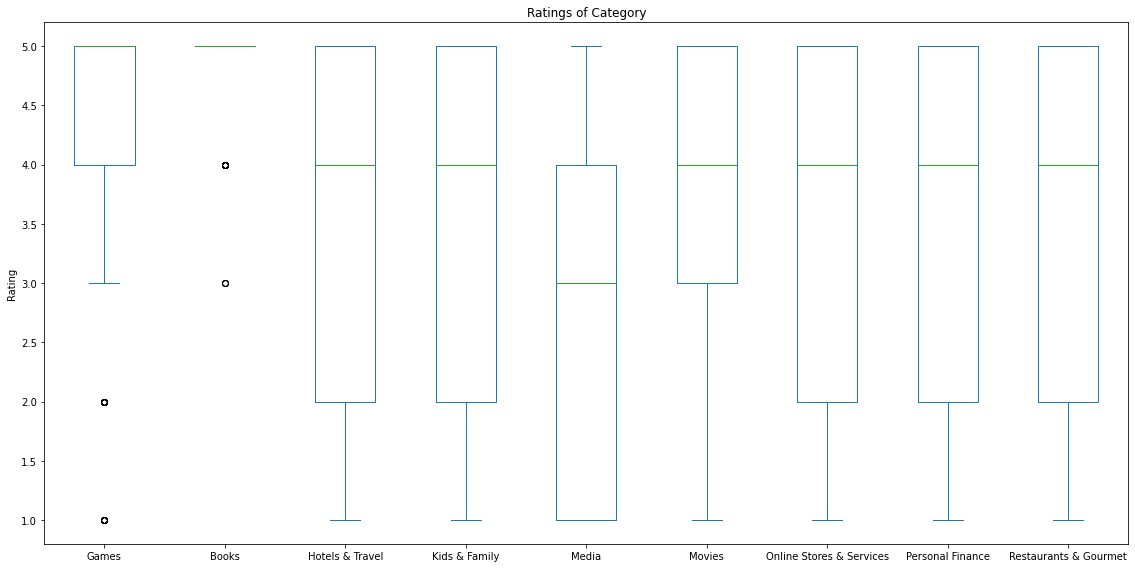

In [16]:
#Create a plot figure

plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

#Plot boxplots for each category and their rating values

category[['Games', 'Books', 'Hotels & Travel', 
          'Kids & Family', 'Media', 'Movies', 
          'Online Stores & Services', 'Personal Finance', 
          'Restaurants & Gourmet']].plot(kind='box', title='Ratings of Category',ylabel = 'Rating')

# Comments on Category and Rating

- We can see that Games and Books have the highest average rating value, with only some outlier lower values
- Hotel Travel, Kid Family, Online store, Personal Finannce and Restaurant have similar average values, min max and Q1-3
- Movies have slightly higher average values, and higher Q1 than the previous categories. They also have the most entries
- Media has the lowest average value

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [22]:
#Group the data by user Id

userId = opinion.groupby('userId')

#Count of the number of rating entries for each user Id
userId.item.count()

userId
3        3
4        3
5        1
7        1
10       1
        ..
15720    1
15723    1
15726    6
15727    1
15730    1
Name: item, Length: 4326, dtype: int64

In [34]:
#Get dataframe of opinion, but only take rows of user Id whose number of ratings is greater or equal to 7

opinion_gt7 = opinion[opinion.groupby('userId')['item'].transform('count').gt(6)]

opinion_gt7.head()

,userId,gender,item,rating,review,helpfulness,timestamp,category
19,11818,M,NetZero,5.0,A free ISP that became a contender?,4.0,11102,Online Stores & Services
20,11818,F,eBay,3.0,eBay can be quite costly for sellers...,4.0,43002,Online Stores & Services
21,11818,F,Sega Dreamcast Grey Console,5.0,More like a beginer's hacking machine,4.0,61201,Games
22,11818,F,Scary Movie,3.0,A great see-it-once comedy,2.0,61201,Movies
23,11818,M,AOL (America Online),2.0,AOL still hasn't changed since it's debut,2.0,61501,Online Stores & Services


In [35]:
#Group the data by userId after doing the filter

userId_gt7 = opinion_gt7.groupby('userId')

#Count the number of ratings for each user again
userId_gt7.item.count()

userId
29        7
59       11
94        8
117       7
144       9
         ..
15273     7
15393    18
15494     7
15539     7
15558    10
Name: item, Length: 228, dtype: int64

# Comment

Out of 4236 userIds, only 164 have more than 7 item ratings

In [36]:
#Get the unique userId values in the filtered table and turn the array into a list

userId_gt7 = opinion_gt7['userId'].unique().tolist()

#Sort the list

userId_gt7.sort()
userId_gt7

[29,
 59,
 94,
 117,
 144,
 201,
 207,
 218,
 260,
 267,
 274,
 480,
 540,
 623,
 624,
 667,
 704,
 713,
 889,
 1012,
 1100,
 1131,
 1154,
 1198,
 1248,
 1257,
 1262,
 1370,
 1395,
 1685,
 1720,
 1806,
 1839,
 1871,
 1872,
 1925,
 2005,
 2069,
 2242,
 2253,
 2328,
 2367,
 2392,
 2394,
 2406,
 2412,
 2490,
 2646,
 2653,
 2834,
 2960,
 3001,
 3040,
 3169,
 3228,
 3320,
 3429,
 3569,
 3584,
 3620,
 3683,
 3699,
 3724,
 3729,
 3766,
 3794,
 3868,
 3903,
 4012,
 4044,
 4057,
 4142,
 4154,
 4336,
 4439,
 4598,
 4744,
 4895,
 4903,
 4912,
 5071,
 5418,
 5429,
 5442,
 5572,
 5735,
 5859,
 5860,
 5870,
 5873,
 5902,
 5929,
 5940,
 5975,
 6055,
 6328,
 6355,
 6555,
 6605,
 6648,
 6716,
 6737,
 6765,
 6778,
 6804,
 6805,
 6887,
 6994,
 7054,
 7267,
 7535,
 7604,
 7636,
 7687,
 7827,
 7833,
 7891,
 7930,
 7992,
 8215,
 8302,
 8329,
 8367,
 8373,
 8377,
 8384,
 8457,
 8498,
 8608,
 8723,
 8727,
 8796,
 8840,
 8888,
 9088,
 9282,
 9297,
 9354,
 9425,
 9528,
 9566,
 9570,
 9661,
 9710,
 9720,
 9746,


In [37]:
#Check number of ratings each item has

opinion.groupby('item').rating.count()

item
AOL (America Online)     446
All Advantage            306
Alta Vista (by 1stUp)     84
Amazon.com               110
American Airlines         92
                        ... 
Wendy's                   88
What Lies Beneath         85
X-Men                    121
X.com                     93
eBay                     295
Name: rating, Length: 89, dtype: int64

In [38]:
#Get dataframe of opinion, but only take rows of items whose number of ratings is greater than 11

opinion_i_gt11 = opinion[opinion.groupby('item')['rating'].transform('count').gt(11)]

#Check number of ratings each item has after filter
opinion_i_gt11.groupby('item').rating.count()

item
AOL (America Online)     446
All Advantage            306
Alta Vista (by 1stUp)     84
Amazon.com               110
American Airlines         92
                        ... 
Wendy's                   88
What Lies Beneath         85
X-Men                    121
X.com                     93
eBay                     295
Name: rating, Length: 89, dtype: int64

# Comment

Out of 89 items, all of them have more than 11 ratings

In [39]:
#Get the unique item values in the filtered table and turn the array into a list

item_gt11 = opinion_i_gt11['item'].unique().tolist()

#Sort the list

item_gt11

['NBC',
 'NetFlix',
 'Toy Story 2',
 'Fight Club',
 'Quicken Loans',
 'Outback Steakhouse',
 "Applebee's",
 'Mission: Impossible II',
 'Scary Movie',
 'New York City',
 'eBay',
 'The Legend Of Zelda Ocarina Of Time for Nintendo 64',
 'Sixth Sense',
 'FOX',
 'Huggies Ultra Trim Diapers',
 'South Park: Bigger, Longer & Uncut',
 'All Advantage',
 'NetZero',
 'Sega Dreamcast Grey Console',
 'AOL (America Online)',
 'Southwest Airlines',
 'Sony PlayStation 2 Slimline Console',
 'Blair Witch Project',
 "J. K. Rowling - Harry Potter and the Sorcerer's Stone",
 'PayPal',
 'BlueLight.com',
 'Green Mile',
 'Road Runner (includes MediaOne)',
 'American Airlines',
 'Austin Powers: The Spy Who Shagged Me',
 'The Sims 2: Open for Business for Windows',
 'Bank of America',
 'MyPoints.com',
 'MTV',
 'Matrix',
 'Delta Air Lines',
 'Olive Garden',
 'Gladiator',
 'Shrek',
 'Amazon.com',
 'Erin Brockovich',
 'How the Grinch Stole Christmas',
 'Cast Away',
 'FreeRide.com',
 'Priceline Flight Reservations',

In [40]:
#Filter opinion table for all helpfulness values greater than 2

opinion = opinion[(opinion.helpfulness > 2)]

opinion

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
5,9525,M,Outback Steakhouse,4.0,"Good choice for a reasonably priced, quality s...",3.0,22810,Restaurants & Gourmet
...,...,...,...,...,...,...,...,...
9993,1599,M,All Advantage,2.0,Money For &quot;Nothing&quot;,3.0,102200,Online Stores & Services
9994,1599,M,Google,5.0,Google: Simplicity is Golden,4.0,102400,Online Stores & Services
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies


# Comment

Out of all 9890 ratings, 7562 of them have helpfulness greater than 2

In [41]:
#Filter opinion table for all userIds that are in the user Id greater than 7 items rated list

opinion = opinion[opinion['userId'].isin(userId_gt7)]

opinion

,userId,gender,item,rating,review,helpfulness,timestamp,category
19,11818,M,NetZero,5.0,A free ISP that became a contender?,4.0,11102,Online Stores & Services
20,11818,F,eBay,3.0,eBay can be quite costly for sellers...,4.0,43002,Online Stores & Services
21,11818,F,Sega Dreamcast Grey Console,5.0,More like a beginer's hacking machine,4.0,61201,Games
24,11818,M,Southwest Airlines,4.0,"For quick, no-frills traveling",3.0,70201,Hotels & Travel
25,11818,F,Sony PlayStation 2 Slimline Console,5.0,Now that it's everywhere...,6.0,72701,Games
...,...,...,...,...,...,...,...,...
9930,14791,M,American Pie,5.0,American Pie is one to see!,5.0,20200,Movies
9931,14791,M,All Advantage,4.0,it actually pays!,4.0,20700,Online Stores & Services
9934,14791,F,Matrix,5.0,"makes ya think, doesn't it?",6.0,21000,Movies
9935,14791,F,"Simpsons, The",5.0,Fun for all ages!,5.0,31800,Kids & Family


In [42]:
#Filter opinion table for all items that are in the items with number of ratings greater than 11 items list

opinion = opinion[opinion['item'].isin(item_gt11)]

opinion

,userId,gender,item,rating,review,helpfulness,timestamp,category
19,11818,M,NetZero,5.0,A free ISP that became a contender?,4.0,11102,Online Stores & Services
20,11818,F,eBay,3.0,eBay can be quite costly for sellers...,4.0,43002,Online Stores & Services
21,11818,F,Sega Dreamcast Grey Console,5.0,More like a beginer's hacking machine,4.0,61201,Games
24,11818,M,Southwest Airlines,4.0,"For quick, no-frills traveling",3.0,70201,Hotels & Travel
25,11818,F,Sony PlayStation 2 Slimline Console,5.0,Now that it's everywhere...,6.0,72701,Games
...,...,...,...,...,...,...,...,...
9930,14791,M,American Pie,5.0,American Pie is one to see!,5.0,20200,Movies
9931,14791,M,All Advantage,4.0,it actually pays!,4.0,20700,Online Stores & Services
9934,14791,F,Matrix,5.0,"makes ya think, doesn't it?",6.0,21000,Movies
9935,14791,F,"Simpsons, The",5.0,Fun for all ages!,5.0,31800,Kids & Family


# Comment

Out of 7562 ratings with helpfulness greater than 2, 1842 userIds have equal or more than 7 ratings, all of which correspond to items with more than 11 ratings